In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
url= "https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv"
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


Visualize

In [41]:
px.scatter(df,x='Paleonium',y='Pressure',color='Price')

In [42]:
px.histogram(df,x='Price')

In [43]:
x = df.drop(['Price'],axis=1)
y = df['Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)


In [44]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.945047002969024
MAE: 108.5309837534
MSE: 26313.15869133776


<AxesSubplot:ylabel='Density'>

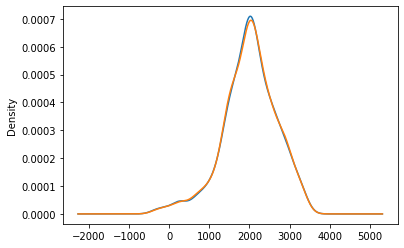

In [45]:
df['pred'] = model.predict(X_scaled)
ax =  df['Price'].plot(kind='kde')
df['pred'].plot(kind='kde',ax=ax)

Cross_Validation

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [1]:
model = DecisionTreeRegressor()
cv = ShuffleSplit(n_splits=40,test_size=0.2,random_state=0)
cv_result = cross_validate(model,X_scaled,y ,cv=cv, scoring=('r2','neg_mean_absolute_error'))

NameError: name 'DecisionTreeRegressor' is not defined

In [48]:
results_df = pd.DataFrame(cv_result)
results_df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error
0,0.000000,0.008181,0.961515,-93.188545
1,0.007803,0.000000,0.966324,-95.289518
2,0.007991,0.000000,0.959578,-102.167742
3,0.008000,0.000000,0.964964,-99.980304
4,0.007908,0.000000,0.967098,-93.501011
5,0.008017,0.000000,0.963027,-92.545053
6,0.007980,0.000000,0.955182,-96.954723
7,0.007987,0.000000,0.963072,-95.181864
8,0.008022,0.000000,0.962766,-97.463593
9,0.013636,0.000000,0.951279,-112.443935


In [50]:
results_df['test_r2'].describe()

count    40.000000
mean      0.962079
std       0.006467
min       0.943009
25%       0.960626
50%       0.963190
75%       0.966274
max       0.975088
Name: test_r2, dtype: float64